In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tasneem/anaconda3/envs/tf-gpu/lib/pyt

In [4]:
#data path
#DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/train"

DATADIR = "/home/tasneem/Downloads/classes (copy)"


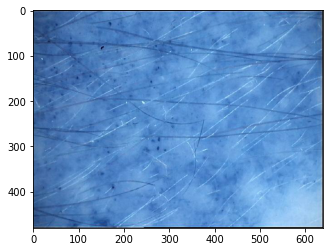

In [5]:
#classes
#CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
CATEGORIES = ["benign","malignant"]

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES: #for every class 
    path = os.path.join(DATADIR,category)  # create path to Atypical Nevus,Common Nevus and Melanoma
    for img in os.listdir(path):  # iterate over each image per each class
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #plt.imshow(RGB_img)  # graph it
        #plt.show() 

        break  # only one image to show
    break  

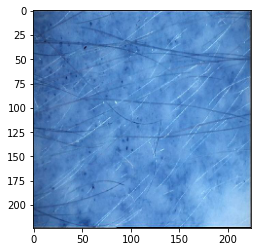

[[[ 59  65  67]
  [ 60  66  74]
  [ 62  66  81]
  ...
  [ 62  70  93]
  [ 84  87 106]
  [ 56  60  58]]

 [[ 74  93 111]
  [ 72  90 114]
  [ 75  92 123]
  ...
  [ 76  99 139]
  [ 95 109 141]
  [ 62  73  81]]

 [[ 51  81 113]
  [ 52  82 120]
  [ 46  75 121]
  ...
  [ 52  86 139]
  [ 54  75 118]
  [ 49  64  82]]

 ...

 [[ 49  83 125]
  [ 45  80 126]
  [ 39  78 129]
  ...
  [153 190 224]
  [158 185 213]
  [116 132 156]]

 [[ 78 100 127]
  [ 75 100 131]
  [ 71  99 135]
  ...
  [181 206 227]
  [181 196 212]
  [131 137 149]]

 [[ 64  70  82]
  [ 61  69  85]
  [ 56  67  87]
  ...
  [  0   3   9]
  [  1   1   3]
  [  9   5   5]]]
(224, 224, 3)


In [6]:
#resize the image

IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()# it will show the image in the size that written above
print(new_array)#print the array of image pixels
print(new_array.shape)#print the shape of the image

In [7]:

# make train set
training_data = []

def create_training_data():
    for category in CATEGORIES:  #for every class

        path = os.path.join(DATADIR,category)  # create path to Atypical Nevus,Common Nevus and Melanoma
        class_num = CATEGORIES.index(category)  # get the classification(0 or a 1 or 2). 0=Atypical Nevus 1=Common Nevus 2=Melanoma

        for img in tqdm(os.listdir(path)):  # iterate over each image per each class
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # to keep the output clean...
                pass
            
            
create_training_data()
#print the number of samples
print(len(training_data))

100%|██████████| 468/468 [00:42<00:00, 11.00it/s]


26512


In [8]:
#shuffling the data
import random

random.shuffle(training_data)#because of our data is orgnized so we need it

In [9]:
#now print the first 10 labels
for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized
     

0
0
0
0
0
0
0
0
0
0


In [10]:

#making features and labels lists
X = []
y = []

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)
    
#print images list    
print(X[0])
print('--------------------')
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))
print('--------------------')
#convert images list to numpy array and print it
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X[0])
print('--------------------')




# confirm the data type
print('Data Type: %s' % X.dtype)
print('--------------------')

# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
print('--------------------')

# calculate  the global mean and standard deviation
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

# centering of pixels(subtract mean)
#X = (X - mean)/ std

# normalize 
X = X/255.0
mean, std = X.mean(), X.std()
X = (X - mean)/ std

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
print('--------------------')

# calculate global mean and standard deviation after centring the pixels
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

#print the array to see the pixel values after changes
print(X[0])


[[[167 154 198]
  [168 157 200]
  [167 154 198]
  ...
  [155 146 197]
  [155 148 190]
  [148 142 189]]

 [[174 159 203]
  [168 155 201]
  [165 156 199]
  ...
  [147 143 192]
  [152 144 190]
  [156 146 193]]

 [[173 156 200]
  [171 158 204]
  [165 151 199]
  ...
  [158 151 194]
  [152 145 192]
  [155 148 191]]

 ...

 [[142 131 169]
  [144 134 176]
  [141 134 172]
  ...
  [161 143 180]
  [163 144 183]
  [151 133 172]]

 [[141 130 168]
  [139 130 170]
  [137 129 170]
  ...
  [170 146 180]
  [162 140 175]
  [148 130 169]]

 [[138 127 169]
  [141 130 170]
  [145 133 174]
  ...
  [163 140 175]
  [159 136 174]
  [150 133 166]]]
--------------------
[[[[167 154 198]
   [168 157 200]
   [167 154 198]
   ...
   [155 146 197]
   [155 148 190]
   [148 142 189]]

  [[174 159 203]
   [168 155 201]
   [165 156 199]
   ...
   [147 143 192]
   [152 144 190]
   [156 146 193]]

  [[173 156 200]
   [171 158 204]
   [165 151 199]
   ...
   [158 151 194]
   [152 145 192]
   [155 148 191]]

  ...

  [[142 1

MemoryError: Unable to allocate 29.7 GiB for an array with shape (26512, 224, 224, 3) and data type float64

In [11]:

#save the data after preprocessing
import pickle

pickle_out = open("X_k_ISIC.pickle","wb")
pickle.dump(X, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_k_ISIC.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [3]:
import pickle
pickle_in = open("X_k_ISIC.pickle","rb")

#pickle_in = open("X2.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_k_ISIC.pickle","rb")
#pickle_in = open("y2.pickle","rb")
y = pickle.load(pickle_in)



In [4]:
# confirm the data type
print('Data Type: %s' % X.dtype)
print('--------------------')

# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
print('--------------------')

# calculate  the global mean and standard deviation
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

# centering of pixels(subtract mean)
#X = (X - mean)/ std

# normalize 
X = X/255.0
mean, std = X.mean(), X.std()
X = (X - mean)/ std

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
print('--------------------')

# calculate global mean and standard deviation after centring the pixels
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

#print the array to see the pixel values after changes
print(X[0])


Data Type: uint8
--------------------
Min: 0.000, Max: 255.000
--------------------
Mean: 171.485, Standard Deviation: 51.537
--------------------


MemoryError: Unable to allocate 29.7 GiB for an array with shape (26512, 224, 224, 3) and data type float64

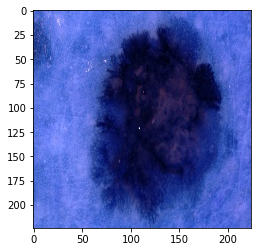

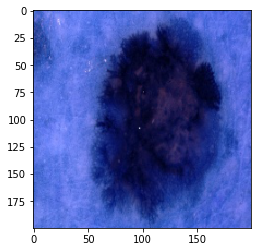

100%|██████████| 104/104 [00:00<00:00, 995.88it/s] 


--------------------
number of images in test set
368
--------------------
0
2
0
1
2
2
0
1
1
1
[[[[ 12  14  57]
   [105 121 182]
   [110 125 193]
   ...
   [ 53  78 149]
   [ 56  82 152]
   [ 60  86 156]]

  [[100 116 176]
   [110 125 189]
   [110 126 195]
   ...
   [ 61  86 156]
   [ 59  84 154]
   [ 58  83 153]]

  [[105 121 185]
   [111 127 194]
   [106 121 192]
   ...
   [ 63  87 158]
   [ 62  87 157]
   [ 62  84 155]]

  ...

  [[151 163 245]
   [157 169 251]
   [153 165 247]
   ...
   [106 121 207]
   [109 123 208]
   [110 124 208]]

  [[144 157 238]
   [153 165 247]
   [151 164 246]
   ...
   [109 124 210]
   [112 126 210]
   [113 127 210]]

  [[151 163 245]
   [147 159 242]
   [152 164 246]
   ...
   [109 123 207]
   [113 127 210]
   [111 125 208]]]]
Data Type: uint8
--------------------
Min: 0.000, Max: 255.000
--------------------
Mean: 147.429, Standard Deviation: 44.567
Min: -3.308, Max: 2.414
--------------------
Mean: 0.000, Standard Deviation: 1.000
--------------------


In [28]:
#making test set following the same steps

#DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/test"
#CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
DATADIR = "/home/tasneem/Downloads/derma_disease_dataset/dataset/test"
CATEGORIES = ["melanoma","nevus","seborrheic_keratosis"]

#testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #plt.imshow(img_array)  # graph it
        #plt.show()

        break  
    break  
    
#resizing    
IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show() # it will show the image in the size i written above

# make test list
testing_data = []

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create the path 
        class_num = CATEGORIES.index(category)  # get the classification 

        for img in tqdm(os.listdir(path)):  # iterate over each image per class
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our testing_data
            except Exception as e:  
                pass
            
create_testing_data()
print('--------------------')
print('number of images in test set')
print(len(testing_data))
print('--------------------')

import random
random.shuffle(testing_data)#shuffling

for sample in testing_data[:10]:
    print(sample[1])#after shuffle it should be not orgized
    
X_test = []
y_test = []

for features,label in testing_data: 
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

#convert to numpy array
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)



# confirm data type
print('Data Type: %s' % X_test.dtype)
print('--------------------')

# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))
print('--------------------')

# calculate  the global mean and standard deviation
mean, std = X_test.mean(), X_test.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

#pixel centering(subtract mean)
#X_test = (X_test - mean)/ std

# normalize 
X_test = X_test/255.0
mean, std = X_test.mean(), X_test.std()
X_test = (X_test - mean)/ std
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))
print('--------------------')

# calculate global mean and standard deviation after centring the pixels
mean, std = X_test.mean(), X_test.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

#print the feauture array
print(X_test[0])



In [29]:
#save the test set
pickle_out = open("X_testk.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_testk.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [30]:
#confirm the train and test set shape
print(X.shape)
print(X_test.shape)

(1240, 200, 200, 3)
(368, 200, 200, 3)


In [62]:
#print(X_test[0:127])
#print(X)